# Installing Packages, models

In [2]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
   ---------------------------------------- 0.0/2.9 GB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 GB 7.0 MB/s eta 0:06:55
   ---------------------------------------- 0.0/2.9 GB 9.7 MB/s eta 0:05:00
   ---------------------------------------- 0.0/2.9 GB 10.8 MB/s eta 0:04:30
   ---------------------------------------- 0.0/2.9 GB 11.0 MB/s eta 0:04:25
   ---------------------------------------- 0.0/2.9 GB 11.3 MB/s eta 0:04:17
   ---------------------------------------- 0.0/2.9 GB 11.0 MB/s eta 0:04:23
   ---------------------------------------- 0.0/2.9 GB 11.1 MB/s eta 0:04:22
   ---------------------------------------- 0.0/2.9 GB 11.0 MB/s eta 0:04:24
   ---------------------------------------- 0.0/2.9 GB 11.0 MB/s eta 0:04:23
   ---------------------------------------- 0.0/2.9 GB 11.0 MB/s eta 0:04:24
   ---------------------------------------- 0.0/2.9 GB 10.9 MB/s eta 0:04:25
   ------------------------

In [3]:
!git clone https://github.com/ultralytics/yolov5 #In terminal, need to install Git first if haven't done so

'git' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
!cd yolov5_drowsiness

In [13]:
pip install -r requirements.txt #install the requirments txts

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#install': Expected package name at the start of dependency specifier
    #install
    ^


In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\yeou1/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-5-22 Python-3.12.4 torch-2.7.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [19]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [20]:
results = model(img)
results.print()

C:\Users\Esco/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 720x1280 2 persons, 1 tie, 1 cell phone
Speed: 2896.7ms pre-process, 69.1ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


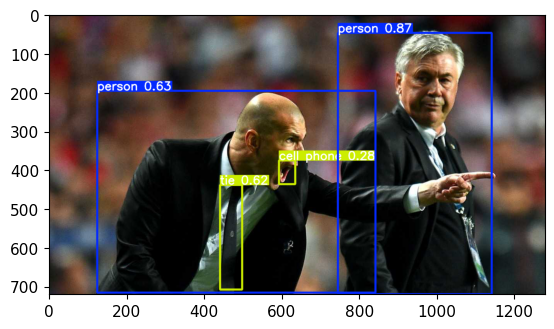

In [21]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [22]:
results.render()

[array([[[76, 51, 44],
         [75, 50, 43],
         [73, 48, 41],
         ...,
         [54, 18, 20],
         [52, 16, 18],
         [51, 15, 17]],
 
        [[76, 51, 44],
         [75, 50, 43],
         [73, 48, 41],
         ...,
         [54, 18, 20],
         [52, 16, 18],
         [52, 16, 18]],
 
        [[76, 51, 44],
         [75, 50, 43],
         [73, 48, 41],
         ...,
         [55, 19, 21],
         [53, 17, 19],
         [52, 16, 18]],
 
        ...,
 
        [[40, 44, 53],
         [39, 43, 52],
         [38, 42, 51],
         ...,
         [38, 50, 50],
         [39, 51, 51],
         [40, 52, 52]],
 
        [[40, 44, 53],
         [39, 43, 52],
         [38, 42, 51],
         ...,
         [38, 50, 50],
         [39, 51, 51],
         [40, 52, 52]],
 
        [[40, 44, 53],
         [39, 43, 52],
         [38, 42, 51],
         ...,
         [37, 49, 49],
         [39, 51, 51],
         [40, 52, 52]]], dtype=uint8)]

In [23]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\Esco/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Esco/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Esco/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Esco/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Esco/.cache\torch\hub\ultralytics_yolov5_master\models\comm

# Trainning

In [4]:
import os
print(os.getcwd())

C:\Users\Esco\OneDrive


In [12]:
os.chdir('C:/Users/Esco/OneDrive/yolov5_drowsiness/yolov5')

In [9]:
import os

for root, dirs, files in os.walk("data"):
    print(root)
    for file in files:
        print("   ", file)

data
    Argoverse.yaml
    coco.yaml
    coco128-seg.yaml
    coco128.yaml
    GlobalWheat2020.yaml
    ImageNet.yaml
    ImageNet10.yaml
    ImageNet100.yaml
    ImageNet1000.yaml
    Objects365.yaml
    SKU-110K.yaml
    VisDrone.yaml
    VOC.yaml
    xView.yaml
data\hyps
    hyp.no-augmentation.yaml
    hyp.Objects365.yaml
    hyp.scratch-high.yaml
    hyp.scratch-low.yaml
    hyp.scratch-med.yaml
    hyp.VOC.yaml
data\images
    bus.jpg
    zidane.jpg
data\scripts
    download_weights.sh
    get_coco.sh
    get_coco128.sh
    get_imagenet.sh
    get_imagenet10.sh
    get_imagenet100.sh
    get_imagenet1000.sh
data\test
data\test\images
    100_jpg.rf.b8b0ae7b73d6c3b1a99f1055b5c3317e.jpg
    102_jpg.rf.c9a94824fbb0d7cbeb8d005d49e14a13.jpg
    104_jpg.rf.302db75d8013f255407f35f6b9fe757a.jpg
    111_jpg.rf.fd0642b4b7ad62ab338f1cf16de8e5db.jpg
    156_jpg.rf.d831d3563cd94a6c79fc6fb0288905cc.jpg
    174_jpg.rf.72f3d5a990de633cf38edb02af19e9de.jpg
    175_jpg.rf.b91c6dca5052820e02a812a9

In [15]:
!python train.py --img 320 --batch 16 --epochs 500 --data data.yaml --weights yolov5s.pt --name drowsiness_detector_runs

WARNING Error decoding JSON from C:\Users\Esco\AppData\Roaming\Ultralytics\settings.json. Starting with an empty dictionary.
Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\Esco\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)


  with torch.cuda.amp.autocast(amp):

    240/499         0G    0.01712   0.007916   0.004406         36        320:  97%|#########6| 205/212 [04:39<00:09,  1.35s/it]
    240/499         0G    0.01712   0.007916   0.004406         36        320:  97%|#########7| 206/212 [04:39<00:08,  1.36s/it]C:\Users\Esco\OneDrive\yolov5_drowsiness\yolov5\train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):

    240/499         0G    0.01712   0.007916   0.004415         34        320:  97%|#########7| 206/212 [04:40<00:08,  1.36s/it]
    240/499         0G    0.017

# Load the model

In [17]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='C:/Users/yeou1/OneDrive/yolov5_drowsiness/yolov5/runs/train/drowsiness_detector_runs5/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\yeou1/.cache\torch\hub\master.zip


YOLOv5  2025-5-28 Python-3.12.4 torch-2.7.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [19]:
cap = cv2.VideoCapture(0)

# Count consecutive drowsy detections
drowsy_frame_count = 0
drowsy_threshold = 30  # Adjust as needed

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)
    detections = results.pandas().xyxy[0]

    # Count how many "drowsy" detections are present
    is_drowsy = 'drowsy' in detections['name'].values

    # Update counter
    if is_drowsy:
        drowsy_frame_count += 1
    else:
        drowsy_frame_count = 0

    # Filter boxes: remove drowsy unless detected long enough
    if drowsy_frame_count < drowsy_threshold:
        # Remove drowsy detections from rendering
        detections = detections[detections['name'] != 'drowsy']
        # Remove corresponding boxes from results
        results.pandas().xyxy[0] = detections

    # Show frame
    frame_with_boxes = np.squeeze(results.render())
    cv2.imshow('YOLO', frame_with_boxes)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

C:\Users\yeou1/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\yeou1/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\yeou1/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\yeou1/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\yeou1/.cache\torch\hub\ultralytics_yolov5_master\models